In [2]:
# Boilerplate at top of file
%load_ext autoreload
%load_ext rmagic
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import datetime
import math

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from ggplot import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The rmagic extension is already loaded. To reload it, use:
  %reload_ext rmagic


In [13]:
# Load in the data
# File format uses 'YYYY-MM-DD-HH_Mi_Se'
df_1 = pd.read_csv('data/2015-10-18-14_27_35.csv')
start_time = datetime.datetime(2015, 10, 11, 13, 47, 46)

n = len(df_1)
print start_time # start time
print start_time + datetime.timedelta(milliseconds=np.sum(df_1.time_diff)) # end time

2015-10-11 13:47:46
2015-10-11 13:50:40.633000


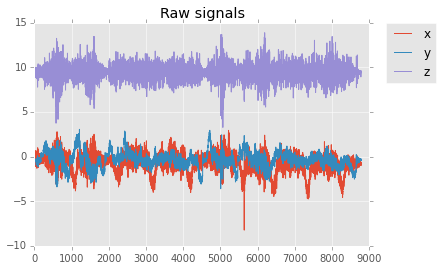

In [14]:
plt.plot(df_1['x'], label='x')
plt.plot(df_1['y'], label='y')
plt.plot(df_1['z'], label='z')
plt.title('Raw signals')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

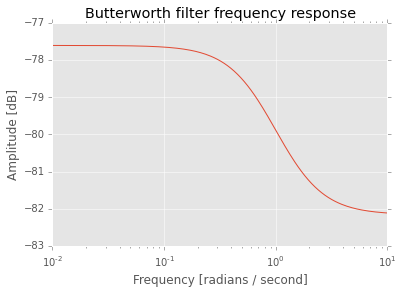

In [37]:
from scipy import signal
# First, design the Buterworth filter
N  = 4   # Filter order
Wn = 0.2 / math.pi# Cutoff frequency
B, A = signal.butter(N, Wn, 'low', output='ba')
df_1['smooth_x'] = signal.filtfilt(B,A, df_1['x']) - np.mean(df_1['x'])
df_1['smooth_y'] = signal.filtfilt(B,A, df_1['y'])- np.mean(df_1['y'])
df_1['smooth_z'] = signal.filtfilt(B,A, df_1['z']) - np.mean(df_1['z'])

df_1['smooth_accel'] = np.sqrt( np.power(df_1['smooth_y'], 2)  + np.power(df_1['smooth_x'], 2))
# df_1['smooth_accel'] = signal.filtfilt(B,A, df_1['accel']) - np.mean(df_1['accel'])
# visualize the designed filter freq response
w, h = signal.freqs(B, A)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')

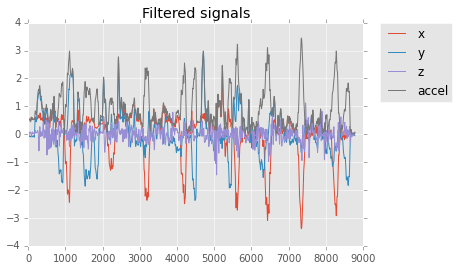

In [33]:
plt.plot(df_1['smooth_x'], label='x')
plt.plot(df_1['smooth_y'], label='y')
plt.plot(df_1['smooth_z'], label='z')
plt.plot(df_1['smooth_accel'], label='accel')
plt.title('Filtered signals')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

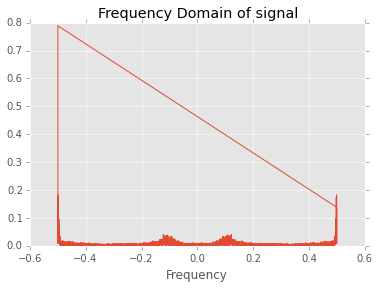

In [52]:
import scipy
# the Fourier transform of the input signal.
sig = df_1['x'] / n
FFT = abs(scipy.fft(sig))
FFT = scipy.fftpack.fftshift(FFT)
freqs = scipy.fftpack.fftfreq(sig.size)
plt.plot(freqs, FFT)
plt.title("Frequency Domain of signal")
plt.xlabel("Frequency")

In [44]:
v0 = 0
def calcualte_speed(df, accel_col, speed_col):
    """
    Calculate speed from a panda data frame
    """
    df[speed_col] = v0
    accel_l = df[accel_col].tolist()
    time_l = df['time_diff'].tolist()
    prev_speed = v0
    speeds = [0]*len(df)
    for i in xrange(len(df)):
        speed_val = prev_speed + float(time_l[i])/1000*accel_l[i]
        speeds[i] = speed_val
        prev_speed = speed_val
    df[speed_col] = np.array(speeds)
    return df
        
df_1 = calcualte_speed(df_1, 'smooth_accel', 'velocity')
df_1 = calcualte_speed(df_1, 'smooth_y', 'velocity_y')
df_1 = calcualte_speed(df_1, 'smooth_x', 'velocity_x')
df_1 = calcualte_speed(df_1, 'smooth_z', 'velocity_z')



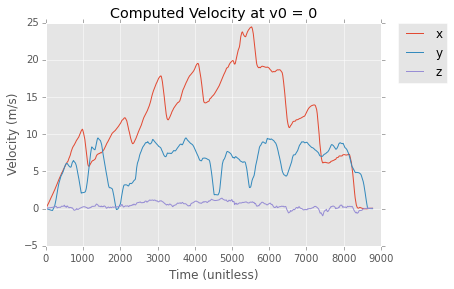

In [49]:
plt.plot(df_1['velocity_x'], label='x')
plt.plot(df_1['velocity_y'], label='y')
plt.plot(df_1['velocity_z'], label='z')
plt.title('Computed Velocity at v0 = 0')
plt.xlabel('Time (unitless)')
plt.ylabel('Velocity (m/s)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

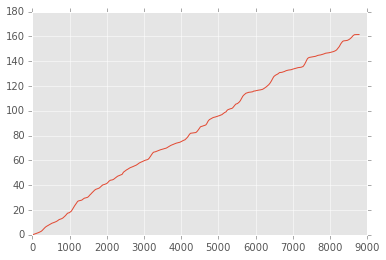

In [50]:
plt.plot(df_1['velocity'])
